In [1]:
from tabula import read_pdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## KNN

In [22]:
class MyKNerestNieghbors():
    
    
    def __init__(self, approach = 'classification' , k = 3, normalization = 'N', 
                 distance_measure = 'euclidean'):
        self.approach = approach
        self.normalization = normalization
        self.distance_measure = distance_measure
        self.k = k
        
    
    def compute_euclidean_distance(self, instance1, instance2, length):
        square_diff = 0  
        for x in range(length):
            square_diff += np.power(instance1[x] - instance2[x],2)
            distance = np.sqrt(square_diff)
        return distance
    
    def compute_manhattan_distance(self, instance1, instance2, length):
        result = 0
        for i in range(length):
            result += abs(instance1[i] - instance2[i])
        return result
   
    
    def data_normalization(self, instance):
        for i in range(len(instance)):
            #normalize all features except target
            norm = np.linalg.norm(instance[i][:-1], axis = 0)
            instance[i][:-1] = instance[i][:-1]/ norm

        return instance

    def k_neighbors(self, k, training_set, testing_set):
        dist_list = []
        length = len(testing_set)-1
        
        for i in range(len(training_set)):    
            if self.distance_measure == 'euclidean':
                distance = self.compute_euclidean_distance(testing_set, 
                                                           training_set[i], length)
            elif self.distance_measure == 'manhattan':
                distance = self.compute_manhattan_distance(testing_set, 
                                                           training_set[i], length )
            dist_list.append((training_set[i], distance))

        temp = sorted(dist_list, key = lambda x:x[1])
        neighbors = [i[0] for i in temp][:k]

        return neighbors
    


    
    def get_prediction(self, neighbors):
        predict_dict = {}   
        predict_list = []
        
        if self.approach == 'classification':
            for i in range(len(neighbors)):
                predict = neighbors[i][-1]
                if predict in predict_dict:
                    predict_dict[predict] += 1
                else:
                    predict_dict[predict] = 1

            prediction_list = sorted(predict_dict.items(), key = lambda x:x[1], 
                                     reverse = True)
            res = prediction_list[0][0]
            
        elif self.approach == 'regression':
            for i in range(len(neighbors)):
                predict_list.append(neighbors[i][-1])
                avg_value = np.mean(predict_list)    
            res = avg_value
        
        return res
    
    
    
    def model_accuracy(self, testing_set, prediction):
        count = 0
        for i in range(len(testing_set)):
            if testing_set[i][-1] is prediction[i]:
                count += 1
        result = (count/float(len(testing_set))) * 100
        return result
    
    
    def fit(self, training_set, testing_set):
        prediction = []
        
        if self.normalization == 'Y':
            self.data_normalization(training_set)
            self.data_normalization(testing_set)
        
        
        if self.approach == 'classification':
            for x in range(len(testing_set)):
                nb = self.k_neighbors(self.k, training_set, testing_set[x])
                result = self.get_prediction(nb)
                prediction.append(result)

            accuracy = self.model_accuracy(testing_set, prediction)
            res = accuracy
        
        elif self.approach == 'regression':
            for x in range(len(testing_set)):
                nb = self.k_neighbors(self.k, training_set, testing_set[x])
                result = self.get_prediction(nb)
                prediction.append(result)
                res = prediction
        
        return res

## Data Processing

In [4]:
#extract data
data = read_pdf('data.pdf',  pandas_options={'header': None})

In [5]:
data.shape

(39, 4)

In [6]:
data.head()

,0,1,2,3
0,"5.1,3.5,1.4,0.2,A","5.1,3.4,1.5,0.2,A","6.0,2.9,4.5,1.5,B","7.7,3.8,6.7,2.2,C"
1,"4.9,3.0,1.4,0.2,A","5.0,3.5,1.3,0.3,A","5.7,2.6,3.5,1.0,B","7.7,2.6,6.9,2.3,C"
2,"4.7,3.2,1.3,0.2,A","4.5,2.3,1.3,0.3,A","5.5,2.4,3.8,1.1,B","6.0,2.2,5.0,1.5,C"
3,"4.6,3.1,1.5,0.2,A","4.4,3.2,1.3,0.2,A","5.5,2.4,3.7,1.0,B","6.9,3.2,5.7,2.3,C"
4,"5.0,3.6,1.4,0.2,A","5.0,3.5,1.6,0.6,A","5.8,2.7,3.9,1.2,B","5.6,2.8,4.9,2.0,C"


In [7]:
df = pd.DataFrame(pd.concat([data[0], data[1], data[2], data[3]]))

In [8]:
df.shape

(156, 1)

In [9]:
# remove missing value
df = df[df[0].notnull()]

In [10]:
df = df[0].str.split(',', 4, expand = True)

In [11]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,A
1,4.9,3.0,1.4,0.2,A
2,4.7,3.2,1.3,0.2,A
3,4.6,3.1,1.5,0.2,A
4,5.0,3.6,1.4,0.2,A


In [12]:
df.shape

(150, 5)

In [13]:
#rename column name and reset index
df.columns = ['feature1', 'feature2', 'feature3', 'feature4', 'target']
df = df.reset_index(drop = True)

In [14]:
df.head()

,feature1,feature2,feature3,feature4,target
0,5.1,3.5,1.4,0.2,A
1,4.9,3.0,1.4,0.2,A
2,4.7,3.2,1.3,0.2,A
3,4.6,3.1,1.5,0.2,A
4,5.0,3.6,1.4,0.2,A


In [15]:
#check datatype
df = df.astype({'feature1':'float64', 'feature2':'float64', 
                'feature3':'float64', 'feature4':'float64' })

In [16]:
df.dtypes

feature1    float64
feature2    float64
feature3    float64
feature4    float64
target       object
dtype: object

In [17]:
df.describe()

,feature1,feature2,feature3,feature4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/Users/Jammy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

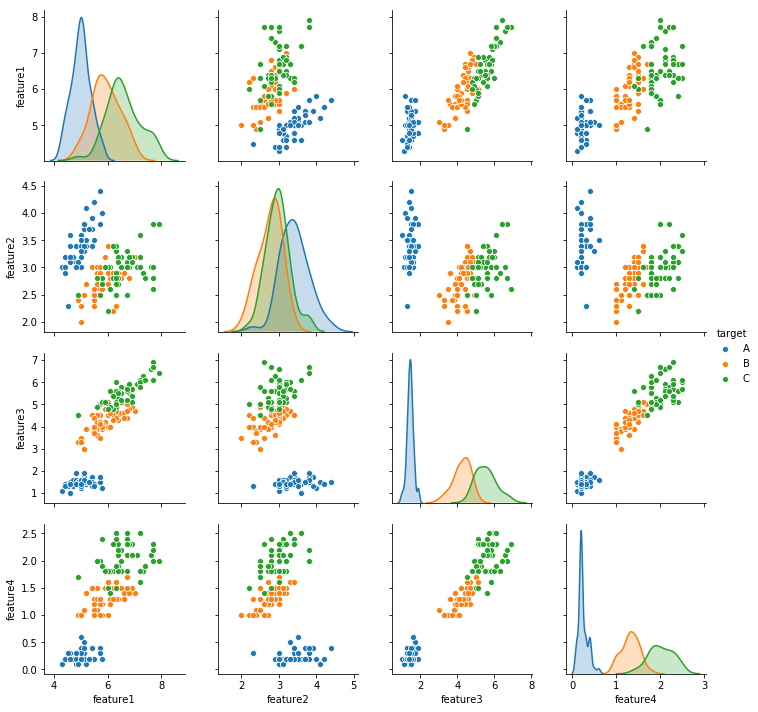

In [18]:
plt.figure()
sns.pairplot(df, hue = 'target')
plt.show()

<Figure size 432x288 with 0 Axes>

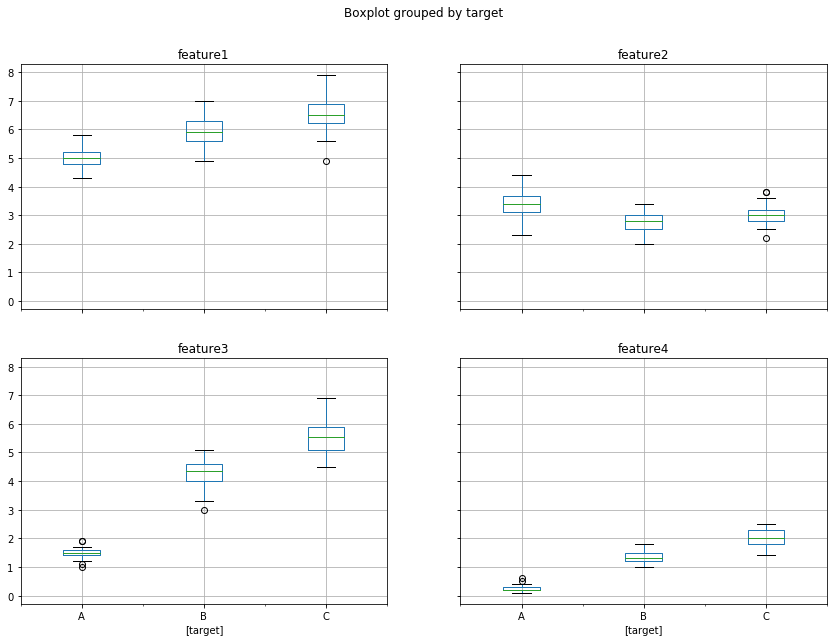

In [19]:
plt.figure()
df.boxplot(by = 'target', figsize= (14, 10))
plt.show()

In [20]:
#Split dataset into training set (70%) and testing set (30%)
training_idx = np.random.randint(df.shape[0], size= 105)
testing_idx = np.random.randint(df.shape[0], size=45)

training_set = df.iloc[training_idx, :].values.tolist()
testing_set = df.iloc[testing_idx, :].values.tolist()

## Model

In [23]:
clf = MyKNerestNieghbors()
clf.fit(training_set, testing_set)

97.77777777777777